### Import Libraries

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data inspection

In [2]:
#reading the data

data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#check shape

data.shape

(730, 16)

In [4]:
#check for columns and datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#check for statistical information of numerical variables

data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Exploratory Data Analysis

In [6]:
#check for null values

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Dropping Unnecessary columns for Analysis and Modeling

1. Dropping <b>instant</b> column as it is a record index which  will not add any meaning to the model.    

2. we can also drop <b>dteday</b> column because we already have <b>yr</b> and <b>mnth</b> columns

3. If we look closely at registered and casual column, they both add up to become cnt. So it is unnecessary to keep those columns as the model can know the pattern and give high prediction on test set leading to data leakage and furhter leading to overfitting

In [7]:
#dropping unnecessary columns

data.drop(['instant','dteday', 'registered', 'casual'], axis = 1,  inplace = True)

In [8]:
#rechecking the data

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
#Mapping the season, mnth, weekday and wethersit to their respect values for better understanding

data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data['mnth'] = data ['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr',
                                   5:'may', 6:'jun', 7:'jul', 8:'aug', 
                                   9:'sep', 10:'oct', 11:'nov', 12:'dec'})
data['weekday'] = data['weekday'].map({1:'mon', 2:'tue', 3:'wed', 4:'thu', 
                                     5:'fri', 6:'sat', 7:'sun'})
data['weathersit'] = data['weathersit'].map({1:'clear', 2:'mist', 3:'light_snow', 4:'heavy_rain'})

In [10]:
#check for different dtypes of columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     626 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Data Visualisation

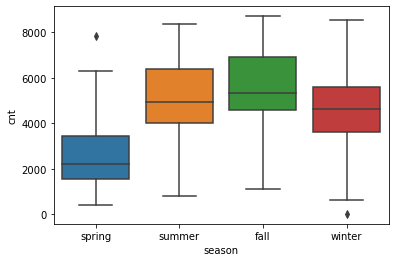

In [11]:
#plotting season with target variable

sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.show()

We can see demand for bike service are low in spring and high in other seasons

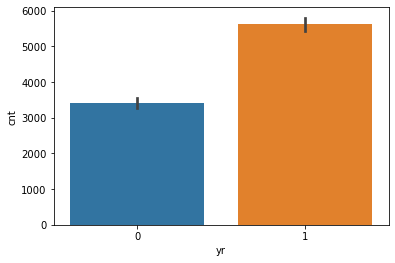

In [12]:
#plotting year variable with target variable

sns.barplot(x = data.yr, y = data.cnt)
plt.show()

It is clearly visible that bike service in 2019 is higher than 2018

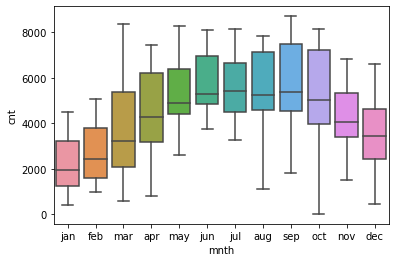

In [13]:
#plotting months with target variable

sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.show()

As we have seen from season variable, during spring(feb, march, april) total count is lower and higher in autumn(aug, sept, oct).

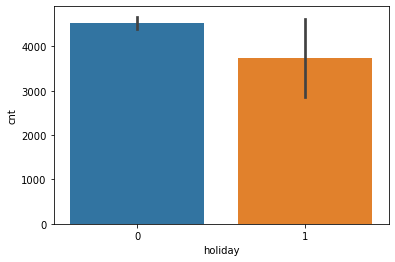

In [14]:
#plotting holiday with target variable

sns.barplot(x = data.holiday, y = data.cnt)
plt.show()

In [15]:
#checking the number of unique values

data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

The data shows that during non-holidays bike service demand is high

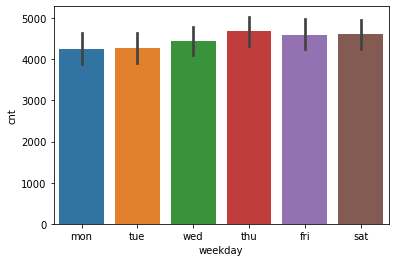

In [16]:
#plotting weekday with target variable

sns.barplot(x = 'weekday', y = 'cnt', data = data)
plt.show()

Count is higest on Thursdays and Saturdays

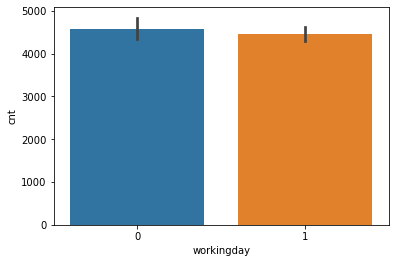

In [17]:
#plotting workingday with target variable

sns.barplot(x = data.workingday, y = data.cnt)
plt.show()

In [18]:
#checking the percentage of unique values

data.workingday.value_counts(normalize = True)

1    0.690411
0    0.309589
Name: workingday, dtype: float64

People mostly use bike services on working days than non-working days

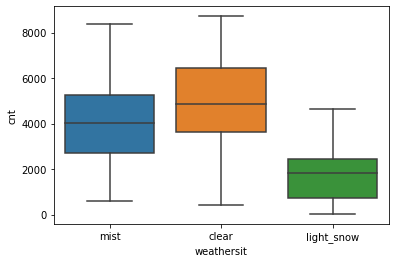

In [19]:
#plotting weather situation with target variable

sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

The demand for bike service is highest when the weather is Clear or partly cloudy

In [21]:
#storing the numerical variables in data_num

data_num = data[['temp', 'atemp', 'hum', 'windspeed','cnt']]

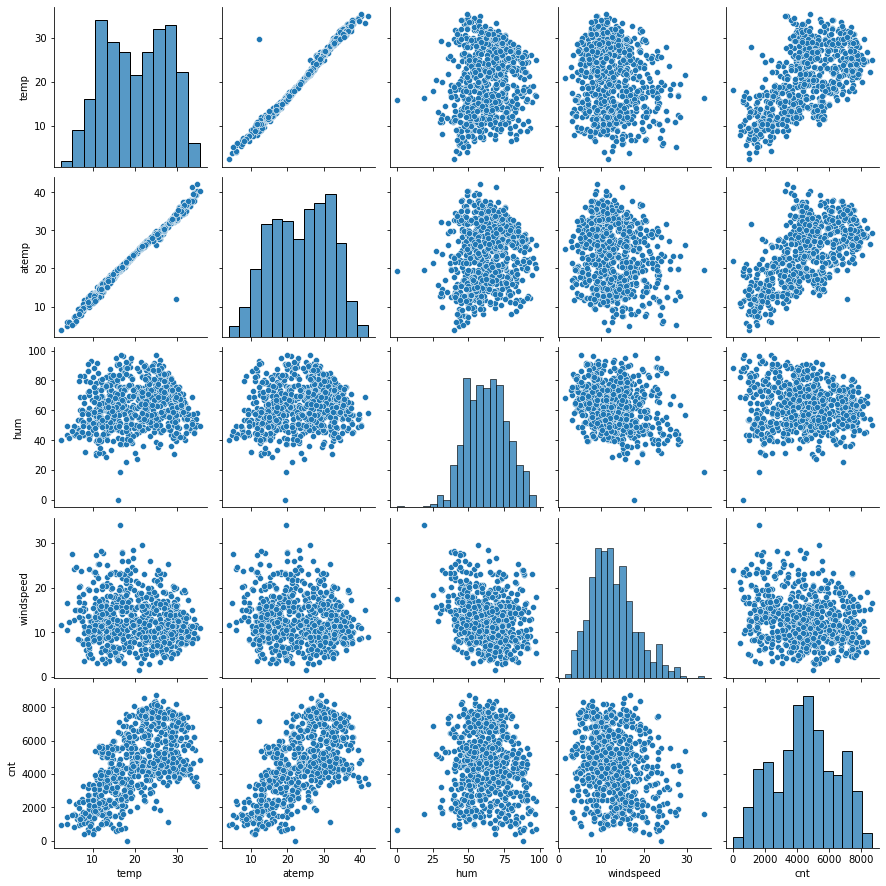

In [22]:
#plotting pairplot between different numerical variables

sns.pairplot(data_num)
plt.show()

As we can see there is linear relationship between cnt and temp variables, so we can perform Linear Regression

In [23]:
#preparing the data before modelling

#adding dummy variables to the data 

data = pd.get_dummies(data, drop_first = True)

In [24]:
#check the shape of new data

data.shape

(730, 29)

In [25]:
#display all the columns and thier infos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  mnth_aug               730 non-null    uint8  
 12  mnth_dec               730 non-null    uint8  
 13  mnth_feb               730 non-null    uint8  
 14  mnth_jan               730 non-null    uint8  
 15  mnth_j

## Modeling

In [26]:
#import necessary libraries for modeling and residual analysis

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [27]:
#splitting the data into train set(70%) and test set(30%) before modeling

df_train, df_test = train_test_split(data, test_size=0.3, random_state=1)

In [28]:
# Apply MinMaxscaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
#Dividing data into X and y for model buiding

y_train = df_train.pop('cnt')
X_train = df_train

In [30]:
#Using LinearRegression() for RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)     #number of features to be selected is 15
rfe = rfe.fit(X_train, y_train)

In [31]:
#display the list of rfe support variables with their rankings

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 4),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 7),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 10),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist', True, 1)]

In [32]:
#display true rfe support variables

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

In [33]:
#display false rfe support varibles

X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_nov', 'weekday_mon', 'weekday_sat',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [34]:
# creating a statsmodel function

def ols_model(col):
    X_train_rfe = X_train[col]
    X_train_rfe = sm.add_constant(X_train_rfe)              # Adding a constant variable
    lm = sm.OLS(y_train,X_train_rfe).fit()                  # Running the linear model
    print(lm.summary())                                     #summary of our linear model

In [35]:
#creating a vif function

def vif_data(col):
    X_train_rfe = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

### Model 1

#### Building model with all the variables with rfe support initially

In [36]:
#fit the model

ols_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     160.5
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          4.53e-179
Time:                        23:11:10   Log-Likelihood:                 503.53
No. Observations:                 511   AIC:                            -975.1
Df Residuals:                     495   BIC:                            -907.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

In [37]:
#vif check

vif_data(col)

                 Features     VIF
3                   atemp  370.99
2                    temp  369.44
4                     hum   15.60
5               windspeed    4.99
7           season_winter    2.60
14        weathersit_mist    2.47
6           season_spring    2.26
0                      yr    2.03
8                mnth_jul    1.58
11               mnth_oct    1.54
13  weathersit_light_snow    1.48
10               mnth_may    1.36
12               mnth_sep    1.30
9                mnth_mar    1.19
1                 holiday    1.05


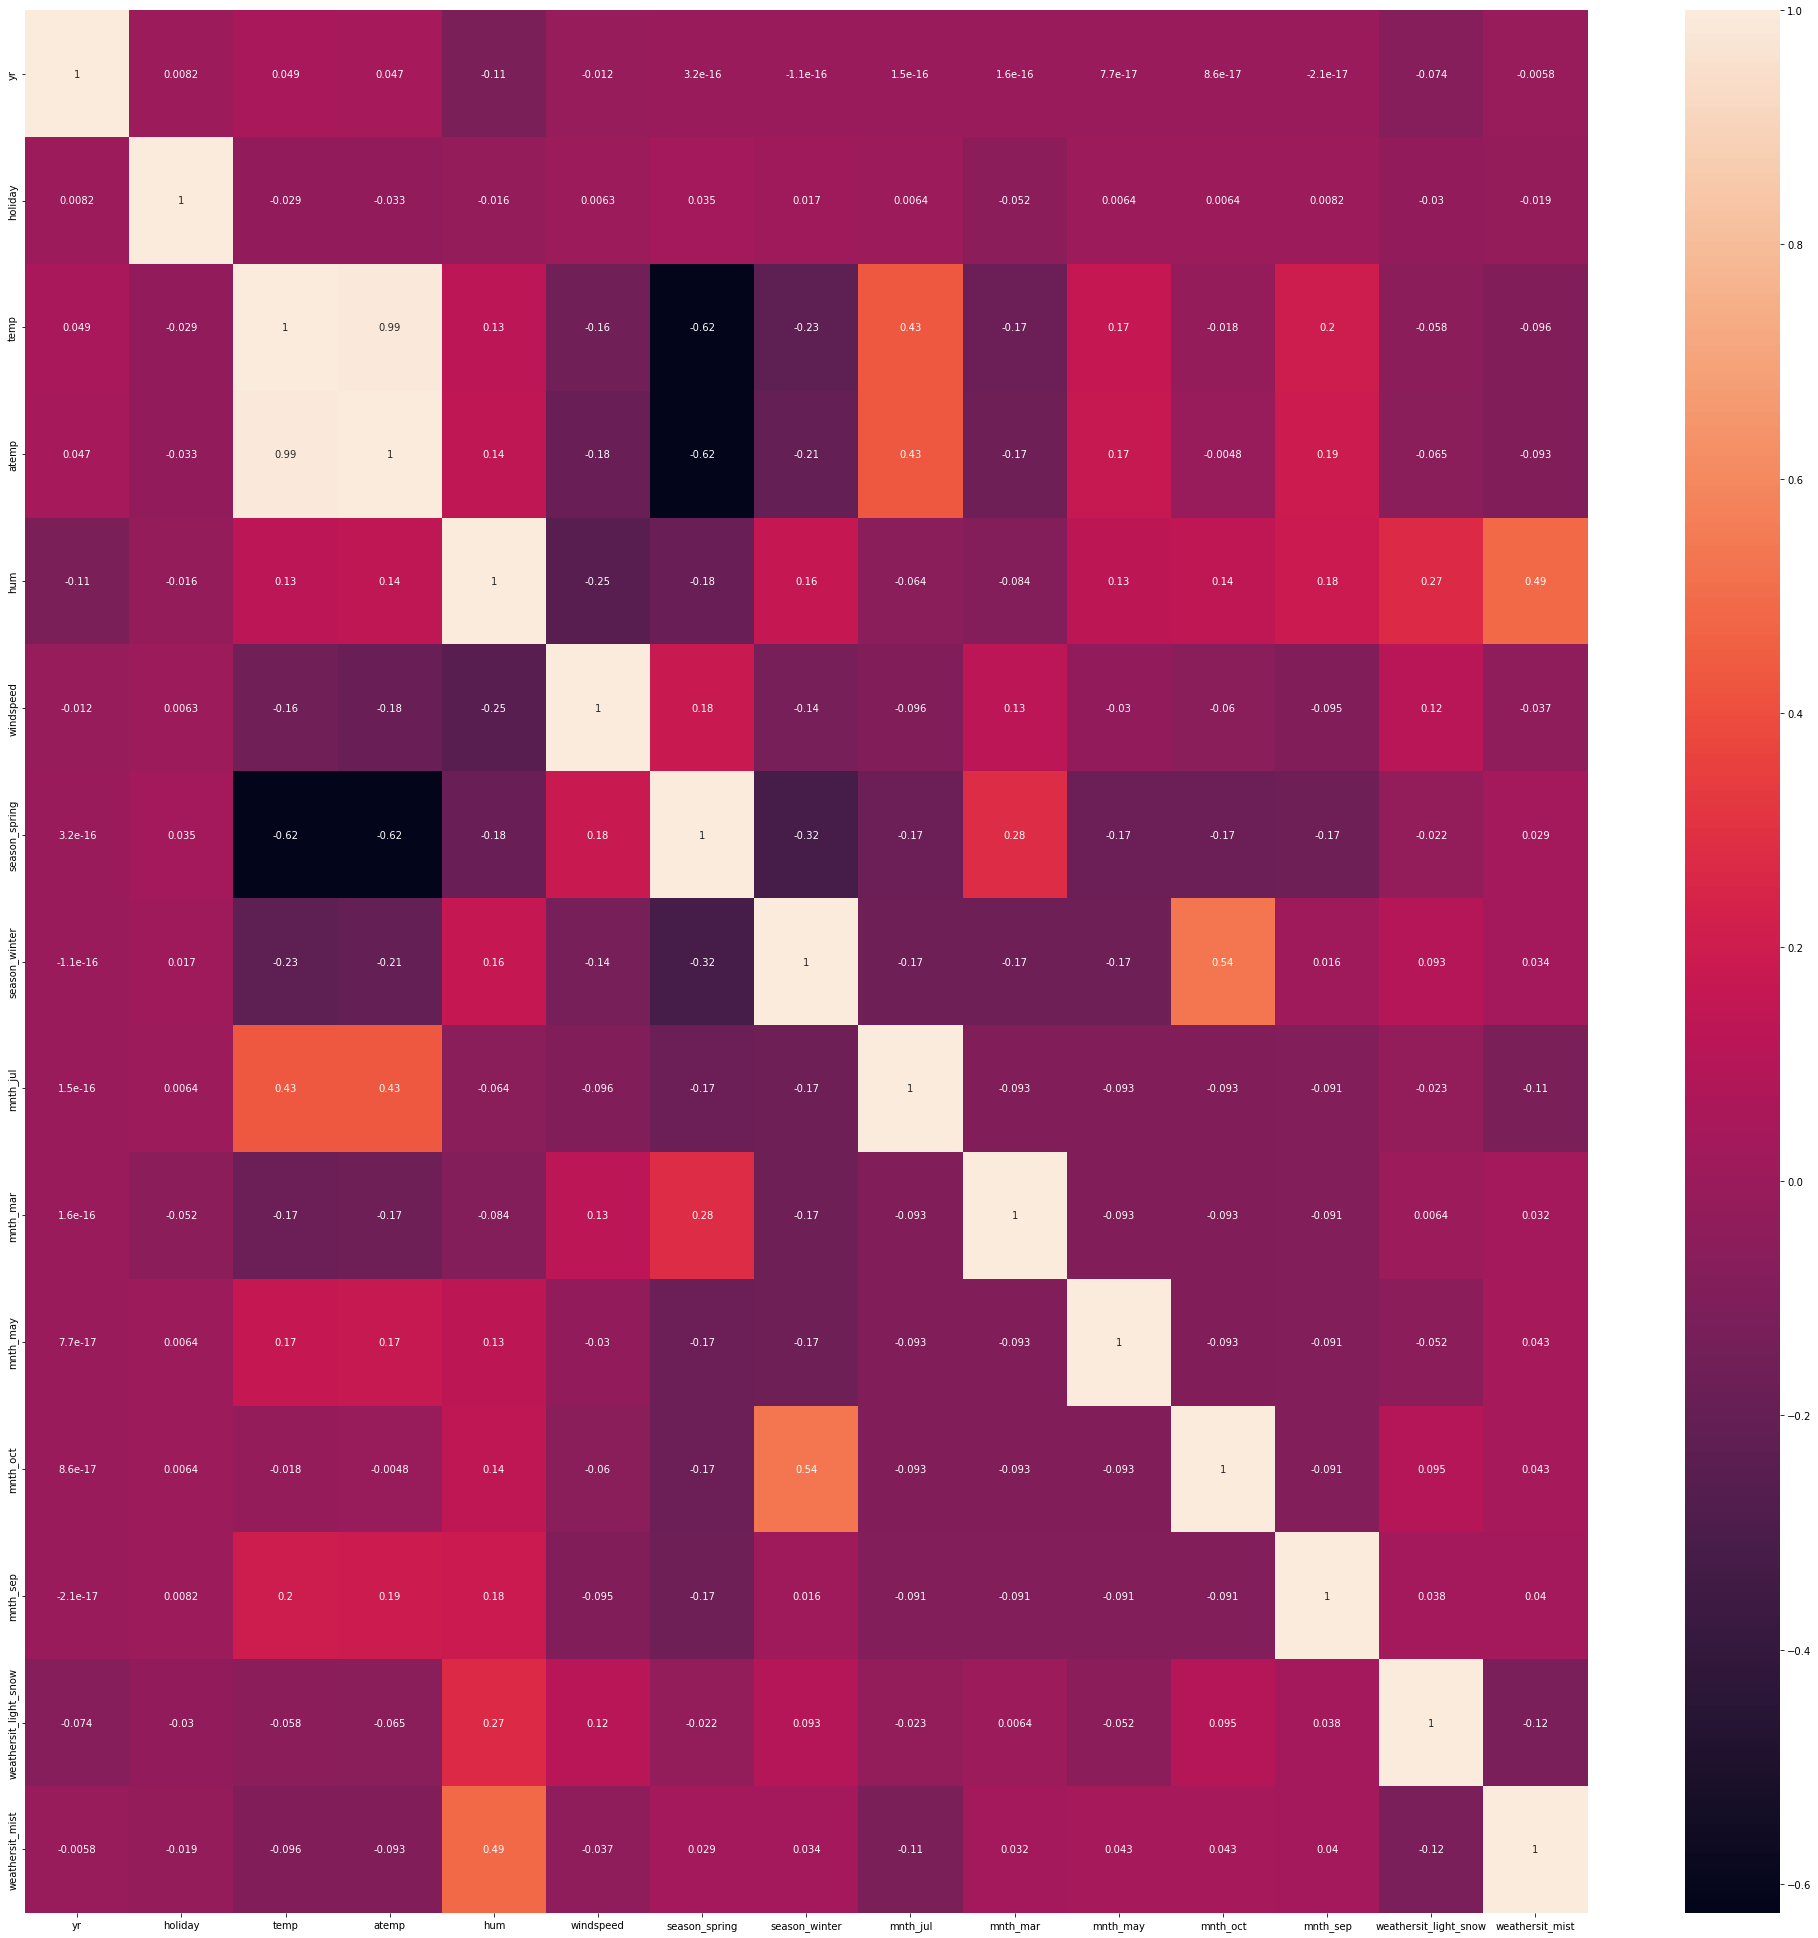

In [38]:
#plotting heatmap to understand the correlation

plt.figure(figsize = (35,35))
sns.heatmap(data[col].corr(), annot = True)
plt.show()

We can see temp is highly correlated with atemp(99%).  
p-value and VIF is also high for atemp, so we can drop the variable

### Model 2

In [39]:
#Rebuilding the model without atemp

col = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_light_snow', 'weathersit_mist']

ols_model(col)   #fitting model
vif_data(col)    #vif check

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.7
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          7.52e-180
Time:                        23:11:13   Log-Likelihood:                 502.70
No. Observations:                 511   AIC:                            -975.4
Df Residuals:                     496   BIC:                            -911.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

VIF of temp has significantly reduced after removing 'atemp' variable with no change in R-squared

### Model 3

In the previous model, hum variable has high VIF which shows high multicollinearity with other variables. So we remove it in upcoming model

In [40]:
#rebuilding model without hum

col.remove('hum')

ols_model(col)   #fitting model
vif_data(col)    #vif check

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.58e-175
Time:                        23:11:13   Log-Likelihood:                 489.70
No. Observations:                 511   AIC:                            -951.4
Df Residuals:                     497   BIC:                            -892.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

There is a huge drop in VIF after removing humidity variable but the p-value increased in case of winter season.  
In data analysis we had also seen that in winter season the demand for bike service is low.  
So we can remove this variable.

### Model 4

In [41]:
#rebuilding model without season_winter

col.remove('season_winter')

ols_model(col)   #fitting model
vif_data(col)    #vif check

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     188.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.28e-176
Time:                        23:11:13   Log-Likelihood:                 488.97
No. Observations:                 511   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -896.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

R-squared is 0.8 which is good but we have still got VIF which is higher than 5. Lets remove 

### Model 5

In [42]:
#rebuilding model without mnth_may

col.remove('mnth_may')

ols_model(col)   #fitting model
vif_data(col)    #vif check

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.9
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.21e-176
Time:                        23:11:13   Log-Likelihood:                 486.86
No. Observations:                 511   AIC:                            -949.7
Df Residuals:                     499   BIC:                            -898.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

R-squared is still 0.8 after removing month_may which is pretty good.   
VIF is still above 5 for temp variable. Lets try removing mnth_jul which is has little high p-value

### Model 6

In [43]:
#rebuilding model without mnth_jul

col.remove('mnth_jul')

ols_model(col)   #fitting model
vif_data(col)    #vif check

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     220.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          4.16e-176
Time:                        23:11:13   Log-Likelihood:                 482.79
No. Observations:                 511   AIC:                            -943.6
Df Residuals:                     500   BIC:                            -897.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

R-squared is still 0.8 after removing month_jul which is pretty good.   
All VIFs are below 5 which indicates that this is a good model

### Model 7

Lets tune the model further. We can see the holiday has little high p-value, so we can remove it and check the model.

In [44]:
#rebuilding model without holiday

col.remove('holiday')

ols_model(col)   #fitting model
vif_data(col)    #vif check

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.25e-175
Time:                        23:11:13   Log-Likelihood:                 478.22
No. Observations:                 511   AIC:                            -936.4
Df Residuals:                     501   BIC:                            -894.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

R-squared is still at 0.8 after removing holiday variable.   
All p-values are very less.    
All VIFs are below 5 which indicates that this is a good model.

#### Build the final model using the variables after OLS Regression Analysis

In [45]:
lr_model = LinearRegression()

lr_model.fit(X_train[col], y_train)    #fit the model

LinearRegression()

### Residual Analysis on train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

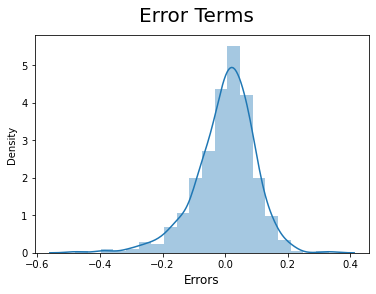

In [46]:
# Plot the histogram of the error terms

y_train_pred = lr_model.predict(X_train[col])

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)                         # X-label
plt.show()

The errors are normally distributed with mean equal to 0

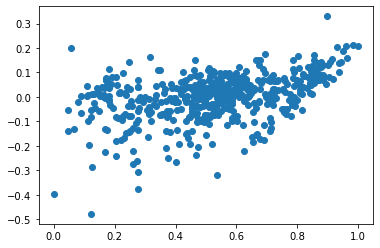

In [47]:
#look for patterns in residuals

residual = y_train - y_train_pred

plt.scatter(y_train, residual)
plt.show()

The residuals are normally distributed, and there are no visible patterns in the error terms (except for the fact that the variance seems to be decreasing a little for the higher values). So, this model fit looks good.

## Making Predictions

In [48]:
# Apply MinMaxscaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [49]:
#Dividing data into X and y 

y_test = df_test.pop('cnt')
X_test = df_test

In [50]:
#Predict the values for test data

y_pred = lr_model.predict(X_test[col])

### Model Evaluation

In [51]:
#R-squared on test set

from sklearn.metrics import r2_score
print('r2 on test set is ', r2_score(y_test, y_pred))
print('r2 on train set is ', r2_score(y_train, y_train_pred))

r2 on test set is  0.8408097480256402
r2 on train set is  0.8117457789026623


R2 value for predictions on test data (0.84) slightly greater than R2 value of train data (0.81).    
We can see that the linear model is performing well on unseen data that is y_test

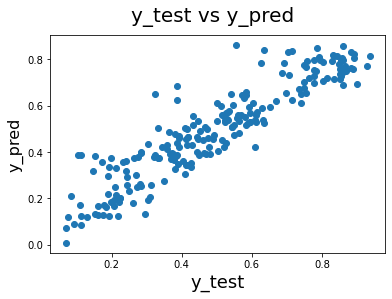

In [52]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

Variance is constant in predictions

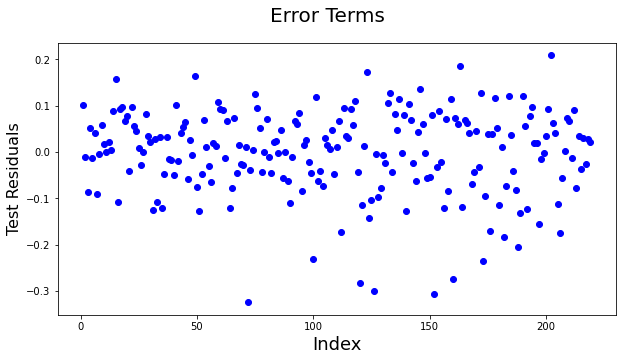

In [53]:
# Error terms 

c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle=" ", marker='o')
fig.suptitle('Error Terms', fontsize=20)                             # Plot heading 
plt.xlabel('Index', fontsize=18)                                     # X-label
plt.ylabel('Test Residuals', fontsize=16)                # Y-label
plt.show()

We can see that the test residuals are random and there is no pattern in them which means model predictions are good.

#### Final Equation for best fitted line

**Interpretation of Coefficients:**   

**const**: The constant value of ‘0.2945’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.2945 units. 

**yr**: A coefficient value of ‘0.2407’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2407 units.       

**temp**: A coefficient value of ‘0.3605’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.3605 units.   

**windspeed**: A coefficient value of ‘-0.1203’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1203 units.

**season_spring**: A coefficient value of ‘-0.1454’ indicated that, a unit increase in season_spring variable decreases the bike hire numbers by 0.1454 units.  

**mnth_mar**: A coefficient value of ‘0.0631’ indicated that, a unit increase in mnth_mar variable decreases the bike hire numbers by 0.0631 units.    

**mnth_oct**: A coefficient value of ‘0.0693’ indicated that, a unit increase in mnth_oct variable increase the bike hire numbers by 0.0693 units.     

**mnth_sep**: A coefficient value of ‘0.0723’ indicated that, a unit increase in mnth_sep variable increases the bike hire numbers by 0.0723 units.

**weathersit_light_snow**: A coefficient value of ‘-0.2859’ indicated that, a unit increase in weathersit_light_snow variable decreases the bike hire numbers by 0.2859 units.

**weathersit_mist**: A coefficient value of ‘-0.0661’ indicated that, a unit increase in weathersit_mist variable decreases the bike hire numbers by 0.0661 units.
